# Class exercises

<hr>

__Exercise 1.__ Suppose a coin is weighted such that, when tossed it comes up heads 70% of times. What is the entropy of this coin?

In [1]:
# Library imports

import math as m
import numpy as np
import random as rd

from collections import Counter

In [2]:
# Global variable & function declaration

n_samples = 1000
p = 0.7

def entropy(p):
    """
    Computes the entropy of a Bernouilli distribution
    """
    if p==0 or p==1: H = 0
    else: H = p * m.log(p)/m.log(2) + (1-p) * m.log(1-p)/m.log(2)
    return -H

def empirical_entropy_coin(p, n_samples):
    """
    Performs 10000 times the calculation
    of the entropy of a biased coin toss
    with p(heads)=p
    """
    average_entropy = []
    for i in range(10000):
        # Performs biased coin toss
        coin_toss = [1 if rd.randint(1,10)>p*10 else 0 
                     for _ in range(n_samples)]
        # Counts elements and records empirical entropy
        count = Counter(coin_toss)
        average_entropy.append(entropy(count[0]/len(coin_toss)))
        # Prints an example draw
        if i==0:
            print(f"Draw {i+1}: Heads (0) represent " + 
                  f"{count[0]/len(coin_toss)*100:.2f}% of the tosses.")
    print(f"Empirical entropy after 10,000 draws: {np.mean(average_entropy):.2f}")
    return np.mean(average_entropy)

In [3]:
# Computes empirical entropy

empirical_entropy_coin(p, n_samples)

Draw 1: Heads (0) represent 69.00% of the tosses.
Empirical entropy after 10,000 draws: 0.88


0.8809147498801642

In [4]:
# Computes expected entropy

entropy(0.7)

0.8812908992306927

<u>Observations:</u>
    
We can infer that with p=0.7, the entropy converges towards 0.881.

<hr>

__Exercise 2.__ What is the entropy of a fair dice? 

In [5]:
# Global variable & function declaration

def expected_entropy_die():
    """
    Computes the expected entropy of a die roll
    """
    H=0
    for i in range(1, 7):
        H += 1/6 * m.log(1/6)/m.log(2)
    return -H

def entropy_die(count, length):
    """
    Computes the entropy of a die roll
    """
    H=0
    for i in range(1, 7):
        p =  count[i]/length
        H += p * m.log(p)/m.log(2)
    return -H

def empirical_entropy_die(n_samples):
    """
    Performs 10000 times the calculation
    of the entropy of a fair dice
    """
    average_entropy = []
    for i in range(10000):
        # Performs biased coin toss
        die = [rd.randint(1,6) for _ in range(n_samples)]
        # Counts elements and records empirical entropy
        count = Counter(die)
        average_entropy.append(entropy_die(count, len(die)))
        # Prints an example draw
        if i==0:
            print(f"Draw {i+1}: '1s' represent " + 
                  f"{count[1]/len(die)*100:.2f}% of the tosses.")
    print(f"Empirical entropy after 10,000 draws: {np.mean(average_entropy):.2f}")
    return np.mean(average_entropy)

In [6]:
# Computes empirical entropy

empirical_entropy_die(n_samples)

Draw 1: '1s' represent 15.00% of the tosses.
Empirical entropy after 10,000 draws: 2.58


2.581385288645799

In [7]:
# Computes expected entropy

expected_entropy_die()

2.584962500721156

<u>Observations:</u>
    
We can infer that with a fair die, the entropy converges towards 2.58.

<hr>

__Exercise 3.__ What is the entropy of a dice that shows 
- "1": 20% of times, 
- "2": 10% of times,
- "3": 5% of times,
- "4": 20% of times,
- "5": 30% of times,
- "6": 15% of times    

In [8]:
# Global variable & function declaration

unfair = {1: 0.2,
          2: 0.1,
          3: 0.05,
          4: 0.2,
          5: 0.3,
          6: 0.15}

def expected_entropy_die(probabilities):
    """
    Computes the expected entropy of an unfair die roll
    """
    H=0
    for i in range(1, 7):
        H += probabilities[i] * m.log(probabilities[i])/m.log(2)
    print(f"The entropy of the unfair die is: {-H:.2f}.")
    return -H

In [9]:
# Computes expected entropy

expected_entropy_die(unfair)

The entropy of the unfair die is: 2.41.


2.408694969562842

<u>Observations:</u>
    
We can infer that with the unfair die, the entropy should converge towards 2.41.

<hr>

__Exercise 4.__ Compute the Kullback-Leibler divergence between the dice of Exercise 2 and the dice of Exercise 3.

In [10]:
# Global variable & function declaration

probas = {1: [1/6, 0.2],
          2: [1/6, 0.1],
          3: [1/6, 0.05],
          4: [1/6, 0.2],
          5: [1/6, 0.3],
          6: [1/6, 0.15]}

def kullback_leibler(probas):
    """
    computes the kullback leibler
    divergence of two dice
    """
    KL=0
    for i in range(1, 7):
        KL += probas[i][0] * np.log(probas[i][0])/np.log(2) - (probas[i][0])*np.log(probas[i][1])/np.log(2)
    print(f"The KL divergence of the two dice are: {KL:.2f}.")
    return KL

In [11]:
# Computes the KL divergence

kullback_leibler(probas)

The KL divergence of the two dice are: 0.21.


0.20864476059248738

# Assignment 4.2

This time we are going to work with the diabetes dataset.


In [12]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [13]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

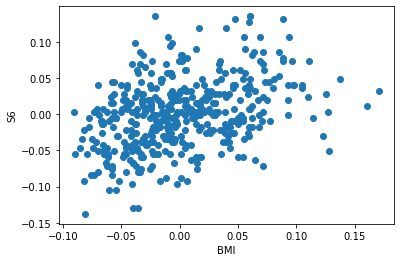

In [14]:
plt.scatter(data[:,2], data[:,9])
plt.xlabel('BMI')
plt.ylabel('S6')
plt.show()

<hr>

__Exercise 1.__ Investigate the relationship between body mass index (data[:,2]) and S6 (data[:,9]). By using the AIC score seen during lesson, can you verify which hypothesis is better supported by the data?

- there is no relationship (constant)
- the relationship is linear
- the relationship is quadratic
- the relationship is cubic
- the relationship is polynomial of order 4

In [15]:
# Global variable declaration

x = data[:,2]
y  = data[:,9]

# degrees = list(range(0,5))

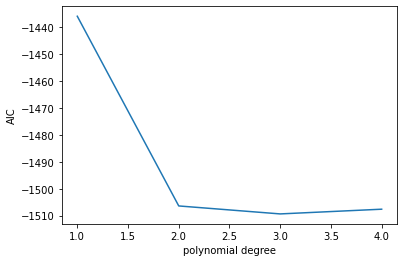

In [16]:
def Gaussian_loglik(x,y,w,sigma2):
    """
    Computes the Gaussian log-likelihood
    """
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y,d):
    """
    Fits a polynomial model
    """
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

loglik = []
AIC = []
for d in range(1,5):
    x_poly = np.array([x**i for i in range(d)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y,d)
    loglik.append(Gaussian_loglik(x_poly,y,w_ml,sigma2_ml))
    dev = -2*np.array(Gaussian_loglik(x_poly, y, w_ml, sigma2_ml))
    AIC.append(dev+2*len(w_ml))

plt.plot(range(1,5), AIC)
plt.ylabel('AIC')
plt.xlabel('polynomial degree')
plt.show()

<hr>

__Exercise 2.__ Repeat the exercise by using the BIC. Discuss the differences in the results, if any.

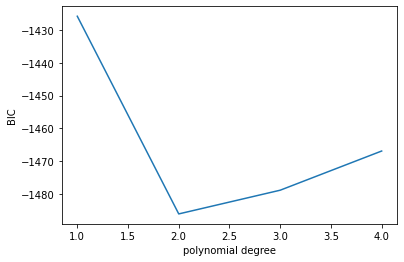

In [17]:
def Gaussian_loglik(x,y,w,sigma2):
    """
    Computes the Gaussian log-likelihood
    """
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y,d):
    """
    Fits a polynomial model
    """
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

loglik = []
BIC = []
for d in range(1,5):
    x_poly = np.array([x**i for i in range(d)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y,d)
    loglik.append(Gaussian_loglik(x_poly,y,w_ml,sigma2_ml))
    dev = -2*np.array(Gaussian_loglik(x_poly, y, w_ml, sigma2_ml))
    BIC.append(dev+2*len(w_ml)*np.log(len(x)))

plt.plot(range(1,5), BIC)
plt.ylabel('BIC')
plt.xlabel('polynomial degree')
plt.show()

In [18]:
def fit_poly(x,y):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

poly_order=list(range(1, 6))

model = poly_order[np.argmin(AIC)]
print(model)

3


[-1436.0173045253575, -1506.4085348469357, -1509.367540400094, -1507.6167371574688]


<function matplotlib.pyplot.show(close=None, block=None)>

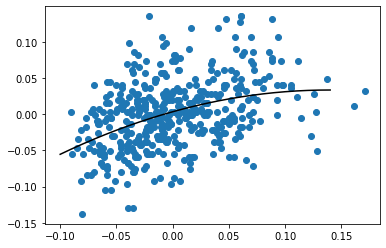

In [19]:
print(AIC)

x_poly = np.array([x**i for i in range(model)]).T
w_ml, sigma2_ml = fit_poly(x_poly, y)

x_plot = np.arange(-0.1, 0.15, 0.01)
x_poly_plot = np.array([x_plot**i for i in range(model)]).T

plt.scatter(x, y)
plt.plot(x_plot, x_poly_plot.dot(w_ml), color="black")
plt.show

In [20]:
poly_order=list(range(1, 6))

model = poly_order[np.argmin(BIC)]
print(model)

2


[-1425.8346847612022, -1486.0432953186248, -1478.8196811076277, -1466.8862581008473]


<function matplotlib.pyplot.show(close=None, block=None)>

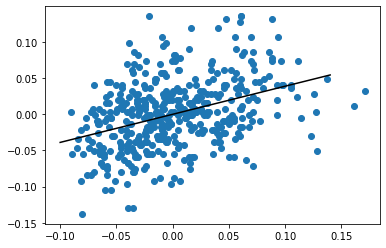

In [21]:
print(BIC)

x_poly = np.array([x**i for i in range(model)]).T
w_ml, sigma2_ml = fit_poly(x_poly, y)

x_plot = np.arange(-0.1, 0.15, 0.01)
x_poly_plot = np.array([x_plot**i for i in range(model)]).T

plt.scatter(x, y)
plt.plot(x_plot, x_poly_plot.dot(w_ml), color="black")
plt.show

<hr>

__Exercise 3.__ Which model would you support between the following:

- target depends on _Age_
- target depends on _Age_ and _Sex_
- target depends on _Age_ and _Body mass index_ 
- target depends on _Age_ and _Body mass index_ and _Average blood pressure_
- target depends on _Age_ and _Sex_ and _Body mass index_ 
- target depends on _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_
- target depends on  _Body mass index_ and _Average blood pressure_

Use any metric (or more metrics) at your discretion, and comment the results

In [22]:
import itertools
import pandas as pd

# Supporting functions for model fitting
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

In [23]:
AIC = []
AICc = []
BIC = []
model = []
ll = []
coef = []
sigma2 = []

# For each number of parameters in the model
for n_elements in range(1,10+1):
    # For each combination of variables
    for indices in itertools.combinations(range(d),n_elements):

        # Store the indices corresponding to the parameters
        model.append(indices)
        
        # Fit the model
        x_train = data[:,indices].reshape(data.shape[0],n_elements)
        w_ml, sigma2_ml = fit_poly(x_train, target)
        
        # compute the log-likelihhod
        training_ll = Gaussian_loglik(x_train,target,w_ml,sigma2_ml)
        
        # store the coefficients
        coefficients = np.zeros(d)
        coefficients[[indices]] = w_ml        
        coef.append(coefficients)
        sigma2.append(sigma2_ml)
        
        # store all the metrics
        ll.append( -training_ll)
        AIC.append(-2*training_ll + 2*n_elements)
        AICc.append(-2*training_ll + 2*n_elements + 2.*n_elements*(n_elements+1)/(x.shape[0]-n_elements-1))
        BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
 


results = pd.DataFrame({'model': model, 'AIC': AIC, 'AICc': AICc, 'BIC' :BIC, 
                                 'neg_loglik' : ll, 'coef' : coef, 'sigma2' : sigma2})  
results.sort_values('AIC', ascending = True, inplace = True)
results.reset_index(inplace = True)
model_comparison = results[['model', 'AIC', 'AICc', 'BIC', 'neg_loglik']]

fitted_models = results[['model', 'coef', 'sigma2']]

<ipython-input-23-ad666ad24666>:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  coefficients[[indices]] = w_ml


In [24]:
differences_wrt_minimum = model_comparison.AIC - model_comparison.AIC[0]
model_comparison.insert(len(model_comparison.columns), 'd', differences_wrt_minimum)
model_comparison[:10]

,model,AIC,AICc,BIC,neg_loglik,d
0,"(2, 3)",5763.825662,5763.852997,5784.190902,2879.912831,0.000000
1,"(1, 2, 3)",5765.452457,5765.507252,5796.000317,2879.726229,1.626795
2,"(0, 2, 3)",5765.803312,5765.858107,5796.351172,2879.901656,1.977650
3,"(2,)",5766.902859,5766.911950,5777.085479,2882.451430,3.077197
4,"(0, 1, 2, 3)",5767.407011,5767.498545,5808.137490,2879.703506,3.581349
5,"(0, 2)",5768.270392,5768.297727,5788.635631,2882.135196,4.444730
6,"(1, 2)",5768.895565,5768.922900,5789.260805,2882.447783,5.069903
7,"(0, 1, 2)",5770.223639,5770.278433,5800.771498,2882.111819,6.397976
8,"(3,)",5781.118644,5781.127735,5791.301264,2889.559322,17.292982
9,"(1, 3)",5782.718575,5782.745910,5803.083815,2889.359288,18.892913


In [25]:
Akaike_weights = np.exp(-0.5 * model_comparison['d'])/np.sum(np.exp(-0.5 * model_comparison['d']))
model_comparison.insert(len(model_comparison.columns), 'AW', Akaike_weights)
model_comparison[:20]

,model,AIC,AICc,BIC,neg_loglik,d,AW
0,"(2, 3)",5763.825662,5763.852997,5784.190902,2879.912831,0.000000,4.122570e-01
1,"(1, 2, 3)",5765.452457,5765.507252,5796.000317,2879.726229,1.626795,1.827738e-01
2,"(0, 2, 3)",5765.803312,5765.858107,5796.351172,2879.901656,1.977650,1.533652e-01
3,"(2,)",5766.902859,5766.911950,5777.085479,2882.451430,3.077197,8.850405e-02
4,"(0, 1, 2, 3)",5767.407011,5767.498545,5808.137490,2879.703506,3.581349,6.878408e-02
5,"(0, 2)",5768.270392,5768.297727,5788.635631,2882.135196,4.444730,4.466911e-02
6,"(1, 2)",5768.895565,5768.922900,5789.260805,2882.447783,5.069903,3.267779e-02
7,"(0, 1, 2)",5770.223639,5770.278433,5800.771498,2882.111819,6.397976,1.682152e-02
8,"(3,)",5781.118644,5781.127735,5791.301264,2889.559322,17.292982,7.245106e-05
9,"(1, 3)",5782.718575,5782.745910,5803.083815,2889.359288,18.892913,3.255548e-05


In [26]:
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

| Dependence | Ranking | 
| :--- | --- |
| _Age_ | 12 |
| _Age_ and _Sex_ | 13 | 
| _Age_ and _Body mass index_ | 5 | 
| _Age_ and _Body mass index_ and _Average blood pressure_ | 2 |
| _Age_ and _Sex_ and _Body mass index_ | 7 |
| _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_ | 4 |
| _Body mass index_ and _Average blood pressure_ | **1** |